In [66]:
import numpy as np
from matplotlib import pyplot as plt

# Problem 1. Predicting Insurance Cost.

The goal for this problem is to get you to do the whole process of splitting data, train a whole bunch of model, do validation and report the **performance**.

Using the data from kaggle. https://www.kaggle.com/mirichoi0218/insurance/home

**Part 1)** 
Write a function 
```python
def predict_insurance(features):
    return predicted_insurance_cost
```

Specification/Hint:
 - Using linear function of features is a bad idea since features such as BMI has a healthy value in the middle. Do something more fancy.
 - You must transform categorical feature in to ordinal feature. (unless there are 2 choices)
 - You must train and validate your model.
 - Explain what you are doing and plot something to show that what you are doing is correct.


In [260]:
import pandas as pd

df = pd.read_csv('data\datasets_13720_18513_insurance.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [261]:
def pad_data(x):
    return np.pad(x, ((0,0), (1,0)), constant_values=1.)

In [322]:
from scipy.optimize import minimize
from scipy.special import expit

class Logistic:
    def __init__(self, w = None):
        self.w = w
    def train(self, xs, ys, w0 = None):
#         padded_xs = pad_data(xs)
        
        if w0 is None:
            w0 = np.array([0.]*xs.shape[1])
        def cost(w):
            p = expit(ys * np.dot(xs, w))
            return -np.sum(np.log(p))
        
        res = minimize(cost, w0)
        self.w = res.x
        if not res.success:
            warnings.warn(res.message)
        return self
        
    def predict_insurance(features):
        pass

(array([353., 459., 288., 135.,  63.,  20.,  11.,   6.,   1.,   2.]),
 array([  4065.356736 ,  18656.3409921,  33247.3252482,  47838.3095043,
         62429.2937604,  77020.2780165,  91611.2622726, 106202.2465287,
        120793.2307848, 135384.2150409, 149975.199297 ]),
 <a list of 10 Patch objects>)

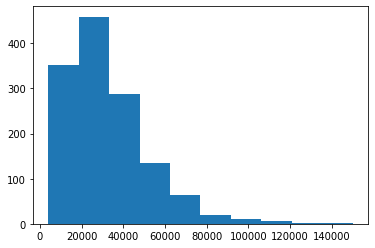

In [263]:
plt.hist(df['bmi']**3)

In [265]:
# df['bmi'] = pd.cut(df['bmi'], 9)
df['bmi'] = df['bmi']**3

In [266]:
df[['bmi']]

,bmi
0,21717.639000
1,38511.743633
2,35937.000000
3,11704.814053
4,24087.491072
...,...
1333,29704.593673
1334,32522.853888
1335,50039.444125
1336,17173.512000


In [267]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [268]:
one_hot = pd.get_dummies(df[['sex', 'smoker', 'region']])
df = df.drop(['sex', 'smoker', 'region'], axis=1)

df = df.join(one_hot)
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,21717.639000,0,16884.92400,1,0,0,1,0,0,0,1
1,18,38511.743633,1,1725.55230,0,1,1,0,0,0,1,0
2,28,35937.000000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,11704.814053,0,21984.47061,0,1,1,0,0,1,0,0
4,32,24087.491072,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,29704.593673,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,32522.853888,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,50039.444125,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,17173.512000,0,2007.94500,1,0,1,0,0,0,0,1


In [297]:
feat = df.drop(['children'], axis=1).copy()
cls = df['children']

In [304]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feat, cls, random_state=0)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

x_test

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
578,52,27543.608000,9724.53000,0,1,1,0,0,0,0,1
610,47,25334.470953,8547.69130,1,0,1,0,0,0,1,0
569,48,66750.487362,45702.02235,0,1,0,1,0,1,0,0
1034,61,56534.676472,12950.07120,0,1,1,0,0,1,0,0
198,51,5880.735125,9644.25250,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
574,57,40335.962222,13224.05705,1,0,1,0,1,0,0,0
1174,29,33107.082931,4433.91590,0,1,1,0,0,1,0,0
1327,51,27081.081027,9377.90470,0,1,1,0,0,0,1,0
817,23,51064.811000,3597.59600,0,1,1,0,0,0,0,1


**Part 2)**

Predicting the number alone is not very useful. We can do even better by reporting the number like
$$
    guess \pm uncertainty
$$
where the uncertainty should mean something along the line of "confidence interval". There are many ways to do this.

Compute the uncertainty and briefly justify your method of calculating the uncertainty.


# Problem 2. Lasso: Gems' idea wan't so crazy after all.

In the class we learn regularization with $\sum w^2$. The fancy name for $\sum w^2$ is called $L_2$ [norm](https://en.wikipedia.org/wiki/Norm_(mathematics)). The resulting regression is called Ridge Regression or $L_2$ regularization.

In this problem we will learn about regularization using $L_1$ norm$ \sum |w|$. The resulting regression is called Lasso Regression.

## Part 1)
Let us consider a problem of least square fitting a line($guess(x) = mx + c$) to data points $x^{(i)}, y^{(i)}$ for $i=1\ldots n$ with $L_2$ regularization.

### Problem 1.1)
Write down the cost function in terms of the given variables. $x^{(i)}, y^{(i)}, m, c, \lambda$
$$
cost(m, c) = \sum_{i=1}^{n}\ldots + \lambda \ldots
$$

$$
cost(m, c) = \sum_{i=1}^{n} \left(mx^{(i)} + c - y^{(i)}\right)^2 + \lambda m^2
$$

### Problem 1.2)
We are interested in solution for $m$ which minimize the cost function. Show that $m$ must satisfy the following equation.

$$
    m + \frac{\lambda}{B} m = C
$$

Find B, C in terms of $x^{(i)}, y^{(i)}, c$

$$ 
\frac{\partial }{\partial m}\left(\left(mx^{(i)} + c - y^{(i)}\right)^2 + \lambda m^2 \right) = 0
$$

$$ 
2x^{(i)}\left(c + mx^{(i)} - y^{(i)}\right) + 2\lambda m = 0
$$

$$ 
x^{(i)}\left(c + mx^{(i)} - y^{(i)}\right) + \lambda m = 0
$$

$$ 
x^{(i)}c + m\left(x^{(i)}\right)^2 - x^{(i)}y^{(i)} + \lambda m = 0
$$

$$ 
m\left(x^{(i)}\right)^2 + \lambda m = x^{(i)}y^{(i)} - x^{(i)}c
$$

$$ 
m + \frac{\lambda}{\left(x^{(i)}\right)^2} m = \frac{x^{(i)}y^{(i)} - x^{(i)}c}{\left(x^{(i)}\right)^2}
$$

$$ 
m + \frac{\lambda}{\left(x^{(i)}\right)^2} m = \frac{y^{(i)} - c}{x^{(i)}}
$$

$$
B = \left(x^{(i)}\right)^2 \text{; } C = \frac{y^{(i)} - c}{x^{(i)}}
$$

### Problem 1.3)

It's clear from the above equation that the solution when $\lambda = 0$ is $m = C$. We will called this $m_{old}$. 

The goal is to compare the solution when there is $L_2$ regularization($m_{new}$) with the solution when there is no regularization($m_{old}$).

**Your task** Show that (find the $\ldots$ part in terms of $\lambda, B, C$)

$$
    m_{new} = \frac{m_{old}}{\ldots}
$$

This means that what $L_2$ regularization does is just rotating/scaling equally the solution so that it becomes nearer to zero. This is the desired effect since we notice that large $w$ typically leads to overfitting.

<img src="l2reg.png" width="400"/>






$$ 
m + \frac{\lambda}{B} m = C
$$

$$ 
m\left(1 + \frac{\lambda}{B} \right) = C
$$

$$ 
m\left(\frac{B + \lambda}{B} \right) = C
$$

$$ 
m = C\left(\frac{B}{B + \lambda} \right)
$$

$$ 
m = \frac{BC}{B + \lambda}
$$

$$ 
m_{new} = \frac{m_{old}}{\frac{BC}{B + \lambda}}
$$

### Problem 1.4

Make the right answer **bold**.

1) If $\lambda$ is large, the answer will get rotated (**more**/less/same).

2) The larger $m_{old}$, the new answer from regularization will get *shifted*($abs(m_{new}-m_{old})$) by (more/**less**/the same) amount.

## Part 2

$L_1$ regularization where we use $\sum |w|$ instead of $\sum{w^2}$ for regularization term has a similar but stronger effect which is desirable sometimes. This problem will guide you through understanding the behavior.

# Problem 2.1

Let us consider the same problem of least square fitting a line($guess(x) = mx + c$) to data points $x^{(i)}, y^{(i)}$ for $i=1\ldots n$ but now with $L_1$ regularization.

### Problem 2.1)
Write down the cost function in terms of the given variables. $x^{(i)}, y^{(i)}, m, c, \lambda$
$$
cost(m, c) = \sum_{i=1}^{n}\ldots + \lambda \ldots
$$



$$
cost(m, c) = \sum_{i=1}^{n} \left(mx^{(i)} + c - y^{(i)}\right)^2 + \lambda |m|
$$

### Problem 2.2)
We are interested in solution for $m$ which minimize the cost function. Show that $m$ must satisfy the following equation.

$$
    m + \frac{\lambda}{B} \text{sgn}(m) = C
$$
where $\text{sgn(m)}$ is a sign function (1 if $m$ is positive, -1 if $m$ is negative, 0 if $m$ is zero)

Find B, C in terms of $x^{(i)}, y^{(i)}, c$

$$ 
\frac{\partial }{\partial m}\left(\left(mx^{(i)} + c - y^{(i)}\right)^2 + \lambda |m| \right) = 0
$$

$$ 
2x^{(i)}\left(c + mx^{(i)} - y^{(i)}\right) + \frac{\lambda m}{|m|} = 0
$$

$$ 
2x^{(i)}\left(c + mx^{(i)} - y^{(i)}\right) + \lambda \text{ sgn}(m) = 0
$$

$$ 
2x^{(i)}c + 2m\left(x^{(i)}\right)^2 - 2x^{(i)}y^{(i)} + \lambda \text{ sgn}(m) = 0
$$

$$ 
2m\left(x^{(i)}\right)^2 + \lambda \text{ sgn}(m) = 2x^{(i)}y^{(i)} - 2x^{(i)}c
$$

$$ 
m + \frac{\lambda}{2\left(x^{(i)}\right)^2} \text{ sgn}(m) = \frac{2x^{(i)}y^{(i)} - 2x^{(i)}c}{2\left(x^{(i)}\right)^2}
$$

$$ 
m + \frac{\lambda}{2\left(x^{(i)}\right)^2} \text{ sgn}(m) = \frac{y^{(i)} - c}{x^{(i)}}
$$

$$
B = 2\left(x^{(i)}\right)^2 \text{; } C = \frac{y^{(i)} - c}{x^{(i)}}
$$

### Problem 2.3)

It's clear from the above equation that the solution when $\lambda = 0$ is $m = C$. We will called this $m_{old}$. 

The goal is to compare the solution when there is $L_1$ regularization($m_{reg}$) with the solution when there is no regularization($m_{old}$).

Once you sketch the plot of $m_{old}$ on $x$ axis against $m_{reg}$ on $y$ axis. You should get a graph that looks like the following.

(In the plot $x_{old}$ is $m_{old}$ and $x_{new}$ is $m_{new}$ )

<img src="l1reg.png" width="400"/>

This means that $L_1$ regularization suppress small value of $m_{old}$ to zero and *shift* the rest down by an equal amount

**Your task**  Find $x^+$ and $x^-$ and $\delta$ in terms of $\lambda, B, C$



$$
x + \frac{\lambda}{B} \text{ sgn}(x) = C
$$

$$
x^+ = C - \frac{\lambda}{B} \text{ ; } x > 0
$$

$$
x^- = C + \frac{\lambda}{B} \text{ ; } x < 0
$$

### Problem 2.4
Make the right answer bold.
From the answer you got in 2.3.

1) If we make $\lambda$ larger, the suppressed range $|x^+-x^-|$ will be (wider,narrower,unaffected).

2) If we make $\lambda$ larger, ther shifted amount $\delta$ will be (wider,narrower,unaffected).

3) Outside the suppressed range, for larger $x_{old}$ the shifted amount will be (wider,narrower,unaffected).

## Epilogue.

Let us consider a useless feature. The weight for this feature is typically small.

$L_2$ regularization will make the weight for this feature smaller. But, $L_1$ supression will bring this down to exactly zero thus completely eliminating useless feature. But the bad things is $\lambda$ for $L_1$ affect both the suppressed range and the shifted amount. 

Good news is we can control this by the linear combination of the two
$\lambda_1 \sum |w| + \lambda_2 \sum w^2$. 

Or some sort of piece wise function ex: [Huber loss](https://en.wikipedia.org/wiki/Huber_loss).
